# Overview of ML and Image Data #11

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist # keras is TensorFlow's high-level API, mnist is a ready-to-use dataset loader.
from numpy import pi



In [24]:
# the data is split into 4 parts (pair of pairs!)
(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpack tuples individual

# training set and testing set.

### Unsupervised / Supervised 

In [25]:
type(x_train) # n dimensional

numpy.ndarray

In [26]:
x_train.shape # 3 dimensional

# meaning: 6000 grayscale images and each image is 28x28 pixels
# output: (number_of_images, height, width)

(60000, 28, 28)

In [27]:
28*28

784

In [28]:
x_train[123].dtype # data type

dtype('uint8')

In [29]:
x_train.max()
2*x_train.max()

/var/folders/mb/7g_24krd1rg7nkvznqz2vs6h0000gn/T/ipykernel_71109/356808575.py:2: RuntimeWarning: overflow encountered in scalar multiply
  2*x_train.max()


np.uint8(254)

In [30]:
y_train.shape # one label per image, each value is a single number: digit 0-9

(60000,)

In [32]:
#x_train[i] #-> image
#y_train[i] #-> correct digit

In [33]:
print(len(x_train[i])) # number of rows

NameError: name 'i' is not defined

In [34]:
print(len(x_train[i][0])) # number of columns

NameError: name 'i' is not defined

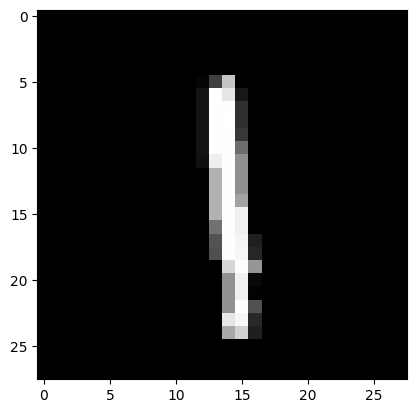

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[i], cmap="gray")
#plt.axis("off")

so the tuple means (exactly)

that tuple is the axis limits of the image:
(x_min, x_max, y_max, y_min)


### Plotting an individual image
note that we need to specify a colormap, otherwise we'd get weird colors

Text(0.5, 1.0, '3')

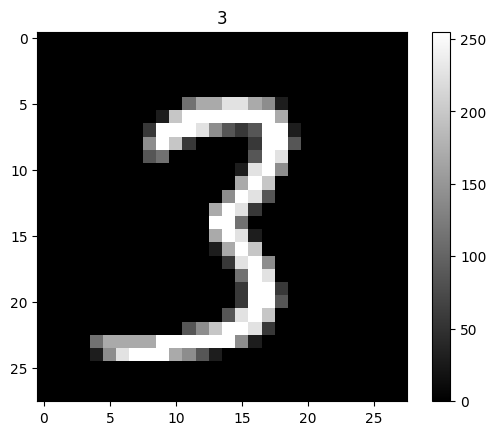

In [ ]:
INDEX = 3435 # pick one example from the dataset. "show me the 3434th handwritten digit"
plt.imshow(x_train[INDEX], cmap='gray') 

#x_train[INDEX] -> a (28,28) matrix of numbers
#imshow interprets that matrix as an image
#cmap='gray' maps: low values -> black, high values -> white 


plt.colorbar() # this adds the scale on the right (0-> black 255 -> white)

label = y_train[INDEX] # y_train stores the correct answer, at the same index, you get the label.
plt.title(label) # displays the labl above the image.

#### Why this works? 
this works bevause MNIST is supervised learning data.

that means,

* x_train[i] -> input(image)
* y_train[i] -> target (correct digit)

they are aligned by index.
so the dataset is really a list of pairs.
(imamge, label)
(image, label)

### Task 0:
plot say 20 images and their labels.

you can use plt.title(str(numerical_label))
remember to force plt to show each image individually by saying plt.show()

In [ ]:
for i in range(20):
    plt.imshow(x_train[i], cmap='gray')
    label = y_train[i]
    plt.title(str(label))
    plt.show()

NameError: name 'plt' is not defined

### Task 1
* combine the train and test images
* combine the train and test labels

how many image-label pairs do we have now?

In [ ]:
img_train_and_test = np.concatenate((x_train, x_test))
label_train_and_test = np.concatenate((y_train, y_test))

print(img_train_and_test.shape)
print(label_train_and_test.shape)

(70000, 28, 28)
(70000,)


1. The syntax for np.concatenate ()is as follows:

arrays: a sequence (tuple, list, etc) of arrays to be joined.

so by default, np.concatenate stacks arrays along axis 0 (the first dimension)


2. where does 70,000 come from?
started with MNIST already split:

**training set**
- x_train.shape -> (60000, 28, 28)
- y_train.shape -> (60000,)


**test set**
- x_test.shape -> (10000, 28, 28)
- y_test.shape -> (10000,)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Task 2
plot, say, 3 images from each class (i.e. having some label)
if you know how, plot each class in the same row

[False  True False ... False False False]


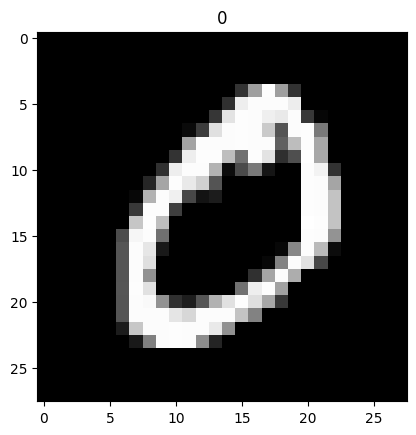

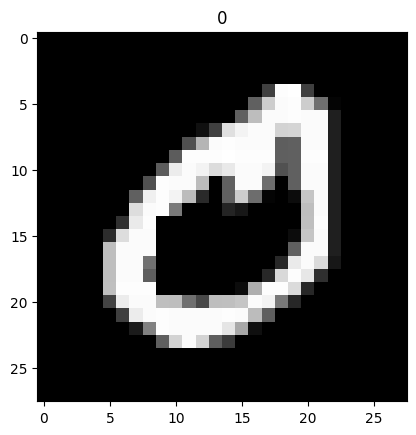

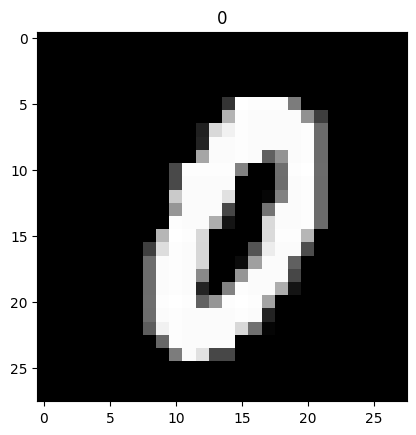

[False False False ... False False False]


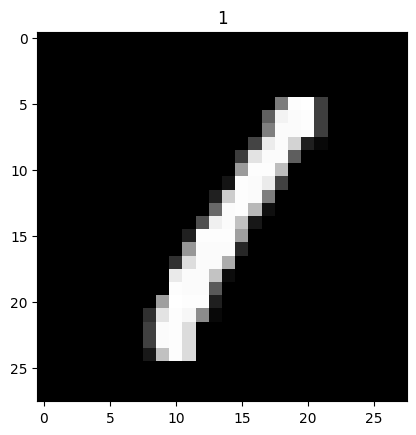

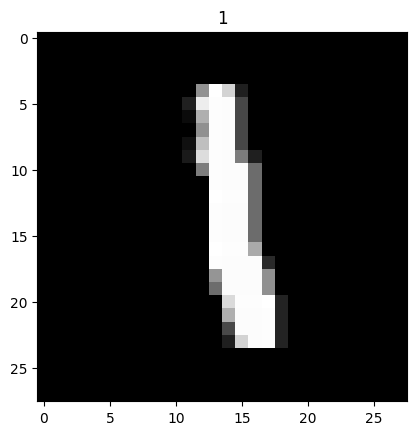

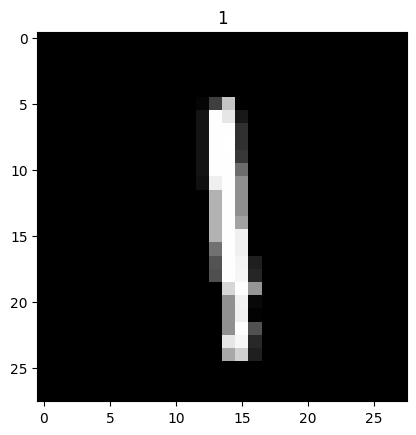

[False False False ... False False False]


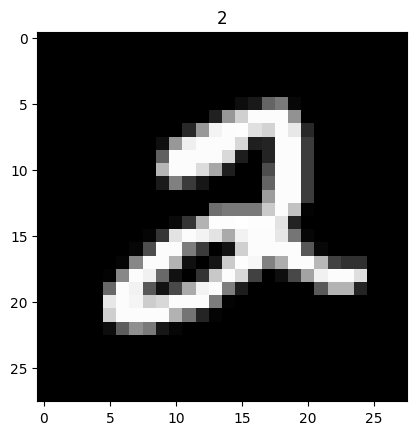

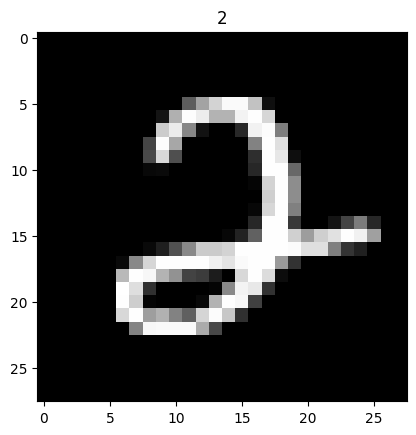

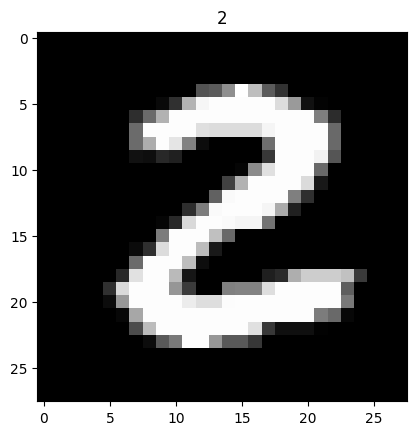

[False False False ... False False False]


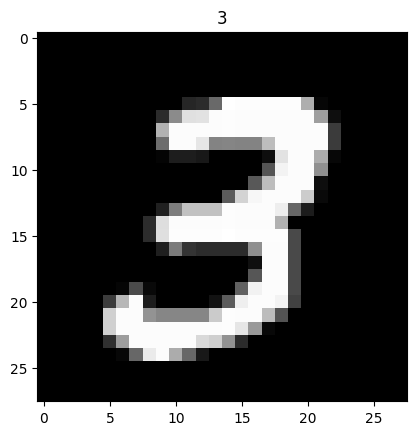

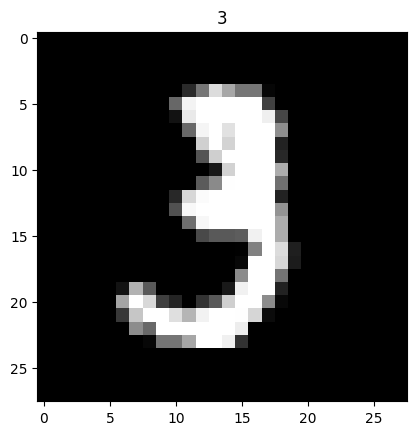

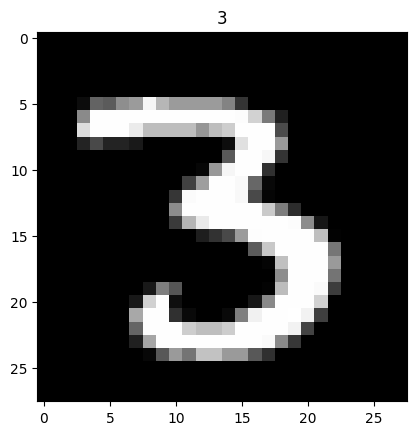

[False False  True ... False False False]


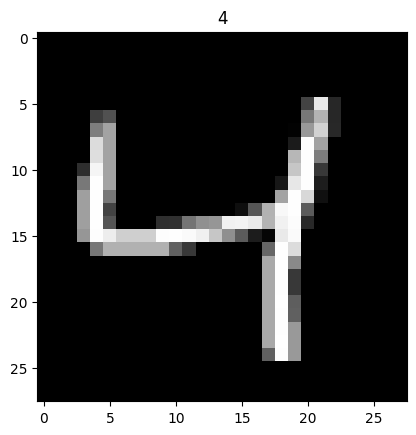

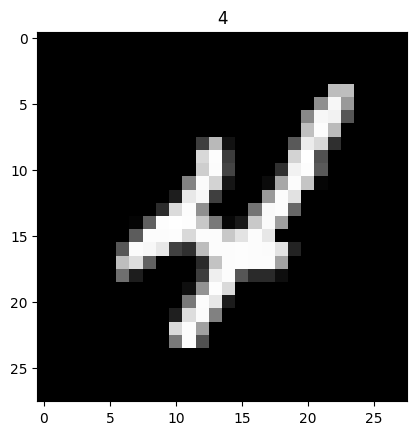

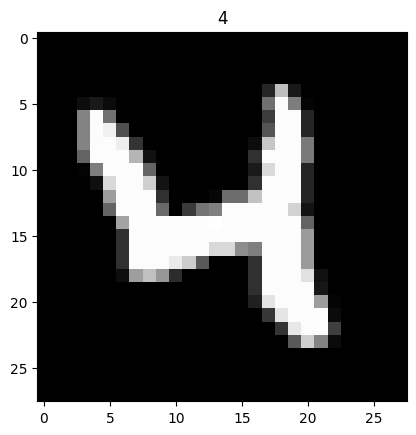

[ True False False ...  True False False]


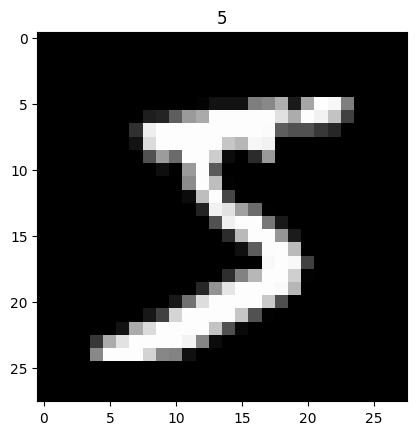

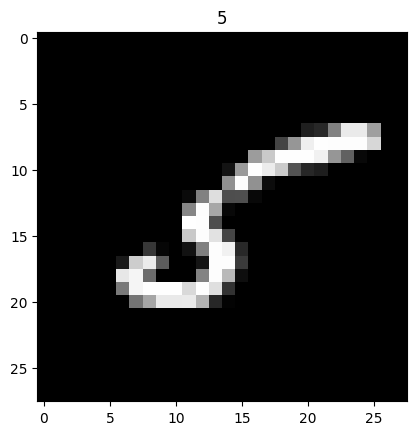

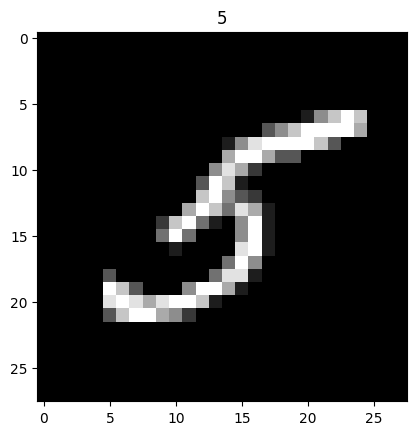

[False False False ... False  True False]


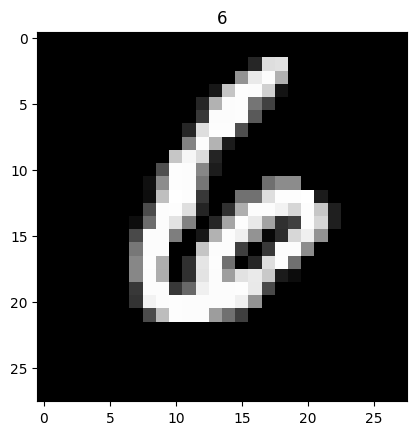

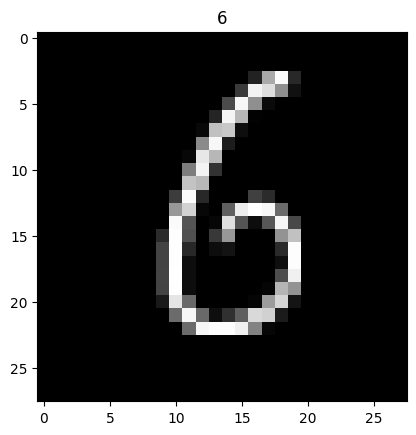

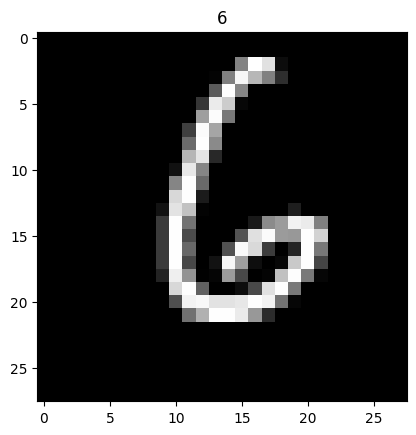

[False False False ... False False False]


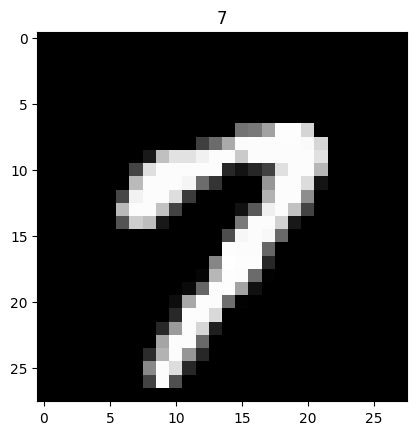

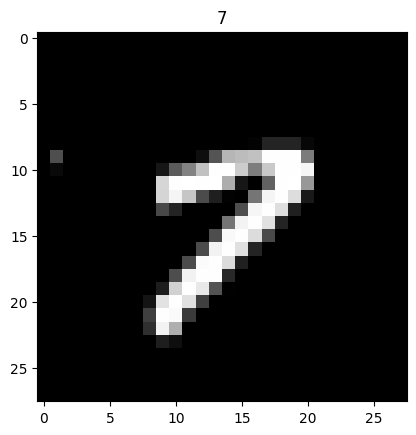

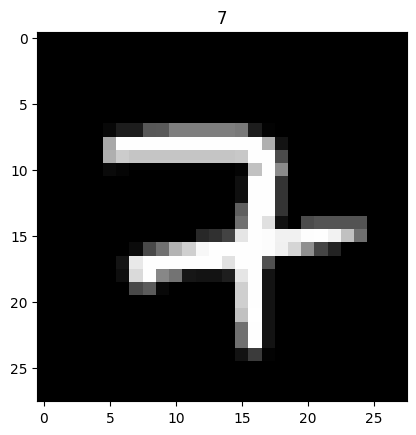

[False False False ... False False  True]


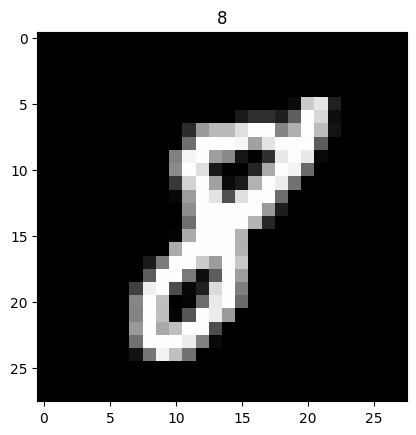

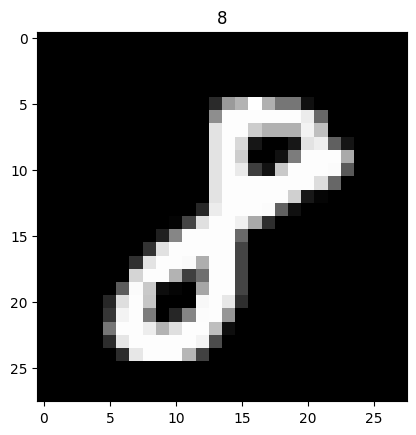

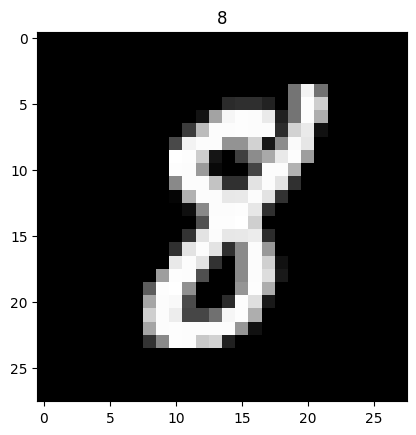

[False False False ... False False False]


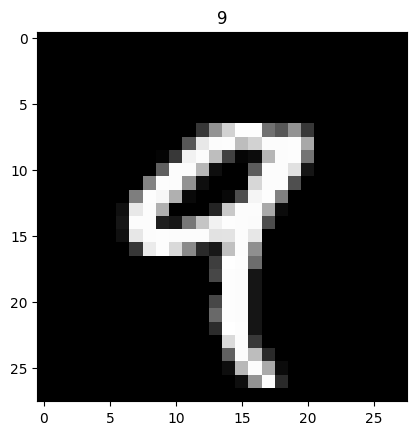

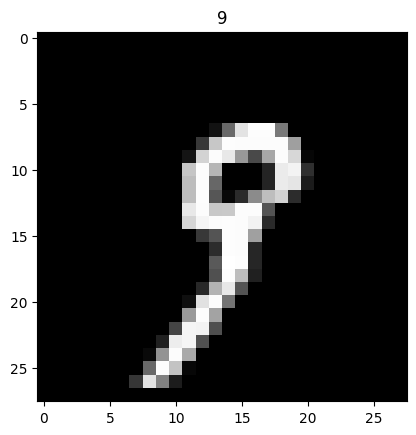

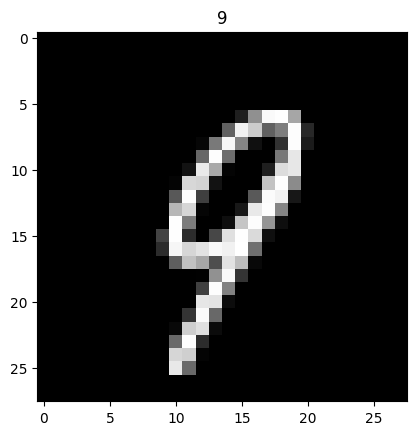

In [ ]:
NUM_LABELS = 10 # MNIST has 10 classes (digits 0-9)
NUM_EXAMPLES = 3 # i want 3 examples per class

for label in range(10): # loop over each digit class
    indices_with_this_label = y_train==label 
    # a boolean array like: [False, True, False, ..., False] length = len(y_train) (60,000)
    # true where the label equals label
    # false everywhere else 
    # which is a boolean mask
    print(indices_with_this_label)


    images_with_this_label = x_train[indices_with_this_label] # this is boolean indexing
    # NumPy reads that boolean array and says:
    # give me only the rows of x_train wehre the mask is true
    for im in images_with_this_label[:3]: # take the first 3 images of that digit, loop over tem one by one
        plt.imshow(im, cmap='gray')
        plt.title(label)
        plt.show()

**For the task 2**
: print 3 different images per class

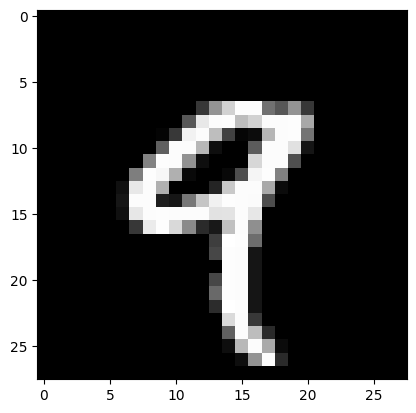

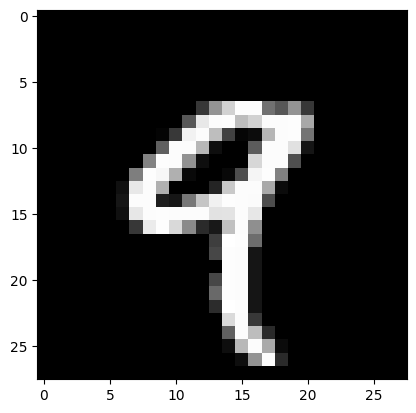

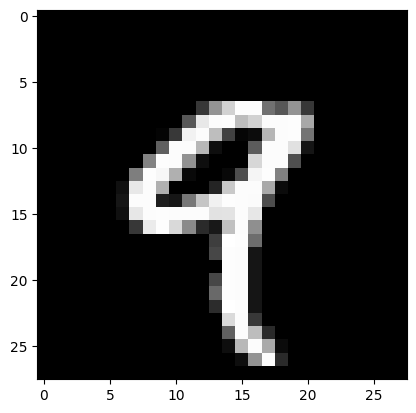

In [ ]:
im = images_with_this_label[0]
for _ in range(3):
    plt.imshow(im, cmap='gray')
    plt.show()

### Task 3
* find the min and max pixel value for each image
* do these values differ much between images?
* using this information, convert the images so that each pixel is a floating point number between 0 and 1

In [ ]:
# wrong: this finds the global minimum and maximum across the netire dataset, not per image.

min = x_train.min()
max = x_train.max()

print(f"minimum is {min}")
print(f"maximum is {max}")

minimum is 0
maximum is 255


In [ ]:
for i in range(20):
    min = x_train[i].min()
    max = x_train[i].max()
    print(f"{i}: min={min}, max={max}")

x_train = x_train.astype("float32") # floating point number betwen 0 and 1
print(x_train[255].dtype)


0: min=0.0, max=255.0
1: min=0.0, max=255.0
2: min=0.0, max=255.0
3: min=0.0, max=255.0
4: min=0.0, max=255.0
5: min=0.0, max=255.0
6: min=0.0, max=255.0
7: min=0.0, max=255.0
8: min=0.0, max=255.0
9: min=0.0, max=255.0
10: min=0.0, max=254.0
11: min=0.0, max=255.0
12: min=0.0, max=255.0
13: min=0.0, max=255.0
14: min=0.0, max=255.0
15: min=0.0, max=255.0
16: min=0.0, max=255.0
17: min=0.0, max=255.0
18: min=0.0, max=255.0
19: min=0.0, max=255.0
float32


In [35]:
a = x_train.min(axis=(1,2)).max()
b = x_train.min(axis=(1,2)).min()

print(a, b, x_train.max())

0 0 255


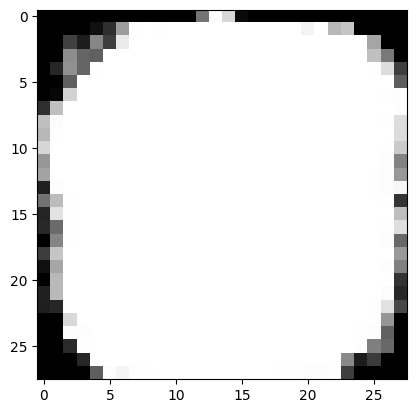

In [38]:
plt.imshow(x_train.max(axis=0), cmap='gray')